# Week 9-2: Unsupervised Machine Learning

PR9-2: Great Outdoors wil graag weten welke producten vaak samen gekocht worden door klanten, door het bouwen van Frequent Itemsets met A-Priori-algoritme. Tip: merge eerst de tabellen 'product' en 'order_details' om een juiste tabel met brongegevens te krijgen waarop je het algoritme kan toepassen. 

* Pas waar nodig Dummy Encoding toe.
* Train het initiële algoritme.
* Experimenteer met meerdere support & confidence thresholds.
* De volgende webpagina's kun je als inspiratie gebruiken. Zij bevatten "codekapstokken" die uitleggen hoe je Frequent Itemsets moet maken en daarmee antwoord kunt geven op de vraag welke producten vaak samen gekocht worden.<br/>
  * <u>Geeks For Geeks</u> 
  * <u>Towards Data Science</u>

## Import libraries

Hier importeren we de libraries die we gaan gebruiken voor deze opdracht.

In [25]:
import pandas as pd
import sqlite3 as sql
from mlxtend.frequent_patterns import apriori, association_rules
import warnings as warn
import matplotlib.pyplot as plt

warn.filterwarnings("ignore")

## Laden van de product tabel en de order_details tabel uit Great_Outdoors_Data_SQLite/go_sales.sqlite

We maken een connectie met de SQLite database, zodat we de juiste tabellen kunnen gebruiken voor het Apriori algoritme.

In [26]:
conn = sql.connect("Great_Outdoors_Data_SQLite/go_sales.sqlite")
conn

## Read the tables product, order_details and merge them

We lezen de product en order_details tabellen uit om ze daarna samen te kunnen voegen.

In [27]:
product = pd.read_sql_query("SELECT * FROM product", conn)
order_details = pd.read_sql_query("SELECT * FROM order_details", conn)

df = product.merge(order_details, on="PRODUCT_NUMBER")
df

,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION,TRIAL888,ORDER_DETAIL_CODE,ORDER_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,TRIAL879
0,1,15-2-2011,1,4,.33,P01CE1CG1.jpg,EN,TrailChef Water Bag,"Lightweight, collapsible bag to carry liquids ...",T,100085,8474,40,4.01,6.03,6.03,T
1,1,15-2-2011,1,4,.33,P01CE1CG1.jpg,EN,TrailChef Water Bag,"Lightweight, collapsible bag to carry liquids ...",T,100086,8470,40,4.01,6.03,6.03,T
2,1,15-2-2011,1,4,.33,P01CE1CG1.jpg,EN,TrailChef Water Bag,"Lightweight, collapsible bag to carry liquids ...",T,100087,8464,48,4.01,6.03,6.03,T
3,1,15-2-2011,1,4,.33,P01CE1CG1.jpg,EN,TrailChef Water Bag,"Lightweight, collapsible bag to carry liquids ...",T,100088,9254,66,4.01,6.03,6.03,T
4,1,15-2-2011,1,4,.33,P01CE1CG1.jpg,EN,TrailChef Water Bag,"Lightweight, collapsible bag to carry liquids ...",T,100089,8472,88,4.01,6.03,6.03,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,99,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ...",T,98478,8210,30,1.97,4.94,4.94,T
43059,99,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ...",T,99566,8246,20,2,5,3.95,T
43060,99,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ...",T,99567,8239,18,2,5,5,T
43061,99,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ...",T,99568,8270,26,2,5,5,T


## Destroy the useless TRIAL-columns

We vernietigen weer de nutteloze TRIAL-kolommen, omdat ze geen functie hebben.

In [28]:
df = df[df.columns.drop(list(df.filter(regex="TRIAL")))]
df

,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION,ORDER_DETAIL_CODE,ORDER_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE
0,1,15-2-2011,1,4,.33,P01CE1CG1.jpg,EN,TrailChef Water Bag,"Lightweight, collapsible bag to carry liquids ...",100085,8474,40,4.01,6.03,6.03
1,1,15-2-2011,1,4,.33,P01CE1CG1.jpg,EN,TrailChef Water Bag,"Lightweight, collapsible bag to carry liquids ...",100086,8470,40,4.01,6.03,6.03
2,1,15-2-2011,1,4,.33,P01CE1CG1.jpg,EN,TrailChef Water Bag,"Lightweight, collapsible bag to carry liquids ...",100087,8464,48,4.01,6.03,6.03
3,1,15-2-2011,1,4,.33,P01CE1CG1.jpg,EN,TrailChef Water Bag,"Lightweight, collapsible bag to carry liquids ...",100088,9254,66,4.01,6.03,6.03
4,1,15-2-2011,1,4,.33,P01CE1CG1.jpg,EN,TrailChef Water Bag,"Lightweight, collapsible bag to carry liquids ...",100089,8472,88,4.01,6.03,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,99,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ...",98478,8210,30,1.97,4.94,4.94
43059,99,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ...",99566,8246,20,2,5,3.95
43060,99,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ...",99567,8239,18,2,5,5
43061,99,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ...",99568,8270,26,2,5,5


## Stuff that is here

Dit staat hier om te staan.

In [29]:
# De kolommen, zonder TRIAL: 
# product: PRODUCT_NUMBER, INTRODUCTION_DATE, PRODUCT_TYPE_CODE, PRODUCTION_COST, MARGIN, PRODUCT_IMAGE, LANGUAGE, PRODUCT_NAME, DESCRIPTION
# order_details: ORDER_DETAIL_CODE, ORDER_NUMBER, QUANTITY, UNIT_COST, UNIT_PRICE, UNIT_SALE_PRICE

# Dummy encoding toepassen op de data

## We drop columns that we don't need for the A-Priori algorithm

We laten kolommen vallen die we niet meer nodig hebben om het A-Priori algoritme te kunnen trainen.

In [30]:
# These are the candidates: 
# product: INTRODUCTION_DATE, PRODUCTION_COST, MARGIN, LANGUAGE, PRODUCT_NAME, DESCRIPTION 
# order_details: ORDER_DETAIL_CODE, ORDER_NUMBER, UNIT_COST, UNIT_PRICE, UNIT_SALE_PRICE

# Remove some columns
df = df.drop(["PRODUCT_NUMBER", "PRODUCT_TYPE_CODE", "PRODUCT_IMAGE", "QUANTITY", "UNIT_SALE_PRICE", "PRODUCTION_COST", "INTRODUCTION_DATE", "MARGIN", "LANGUAGE", "DESCRIPTION", "UNIT_COST", "UNIT_PRICE", "ORDER_DETAIL_CODE"], axis=1)
df

,PRODUCT_NAME,ORDER_NUMBER
0,TrailChef Water Bag,8474
1,TrailChef Water Bag,8470
2,TrailChef Water Bag,8464
3,TrailChef Water Bag,9254
4,TrailChef Water Bag,8472
...,...,...
43058,Aloe Relief,8210
43059,Aloe Relief,8246
43060,Aloe Relief,8239
43061,Aloe Relief,8270


## All columns of the `df` DataFrame will be One-hot (Dummy) encoded

Nu zullen alle kolommen van het `df` DataFrame One-hot encoded worden en dus heel dom zijn, nou ja meer slim. We maken dummies.

In [31]:
# Dummy encode all columns
df = pd.get_dummies(df, columns=["PRODUCT_NAME"])
df = df.groupby("ORDER_NUMBER").max().reset_index()
df = df.drop(["ORDER_NUMBER"], axis=1)
df

,PRODUCT_NAME_Aloe Relief,PRODUCT_NAME_Bear Edge,PRODUCT_NAME_Bear Survival Edge,PRODUCT_NAME_Blue Steel Max Putter,PRODUCT_NAME_Blue Steel Putter,PRODUCT_NAME_BugShield Extreme,PRODUCT_NAME_BugShield Lotion,PRODUCT_NAME_BugShield Lotion Lite,PRODUCT_NAME_BugShield Natural,PRODUCT_NAME_BugShield Spray,...,PRODUCT_NAME_TrailChef Canteen,PRODUCT_NAME_TrailChef Cook Set,PRODUCT_NAME_TrailChef Cup,PRODUCT_NAME_TrailChef Deluxe Cook Set,PRODUCT_NAME_TrailChef Double Flame,PRODUCT_NAME_TrailChef Kettle,PRODUCT_NAME_TrailChef Kitchen Kit,PRODUCT_NAME_TrailChef Single Flame,PRODUCT_NAME_TrailChef Utensils,PRODUCT_NAME_TrailChef Water Bag
0,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5356,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,True,True,False
5357,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
5358,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True


## Trainen van A-Priori algoritme op dataframe `df`

Hier zullen we de frequent itemsets trainen van het A-Priori algoritme op het dataframe `df`.

In [32]:
# Trainen van A-Priori algoritme op dataframe `df` om te zien welke producten vaak samen verkocht worden aan klanten. Hieronder de code:
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
#frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True, max_len=2, verbose=1, low_memory=True) # replace later

# Regels genereren
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.35)
#rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, support_only=False) # replace later
# rules[["support", "confidence"]]
rules[["antecedents", "consequents", "support", "confidence"]]

,antecedents,consequents,support,confidence
0,(PRODUCT_NAME_Blue Steel Max Putter),(PRODUCT_NAME_Hailstorm Titanium Irons),0.025746,0.385475
1,(PRODUCT_NAME_Hailstorm Titanium Woods Set),(PRODUCT_NAME_Blue Steel Max Putter),0.022015,0.350148
2,(PRODUCT_NAME_Lady Hailstorm Titanium Woods Set),(PRODUCT_NAME_Blue Steel Max Putter),0.022761,0.384858
3,(PRODUCT_NAME_Course Pro Umbrella),(PRODUCT_NAME_Hailstorm Titanium Irons),0.020522,0.364238
4,(PRODUCT_NAME_Husky Rope 60),(PRODUCT_NAME_Firefly Charger),0.020522,0.350318
5,(PRODUCT_NAME_Firefly Climbing Lamp),(PRODUCT_NAME_Granite Extreme),0.025933,0.351899
6,(PRODUCT_NAME_Firefly Rechargeable Battery),(PRODUCT_NAME_Husky Rope 100),0.023507,0.352941
7,(PRODUCT_NAME_Granite Hammer),(PRODUCT_NAME_Granite Grip),0.025746,0.359375
8,(PRODUCT_NAME_Hailstorm Titanium Woods Set),(PRODUCT_NAME_Hailstorm Titanium Irons),0.025187,0.400593
9,(PRODUCT_NAME_Lady Hailstorm Titanium Irons),(PRODUCT_NAME_Hailstorm Titanium Irons),0.022761,0.416382


## Plot with most sold products grouped together

Hieronder is een weergave te zien van producten die vaak samen zijn verkocht.

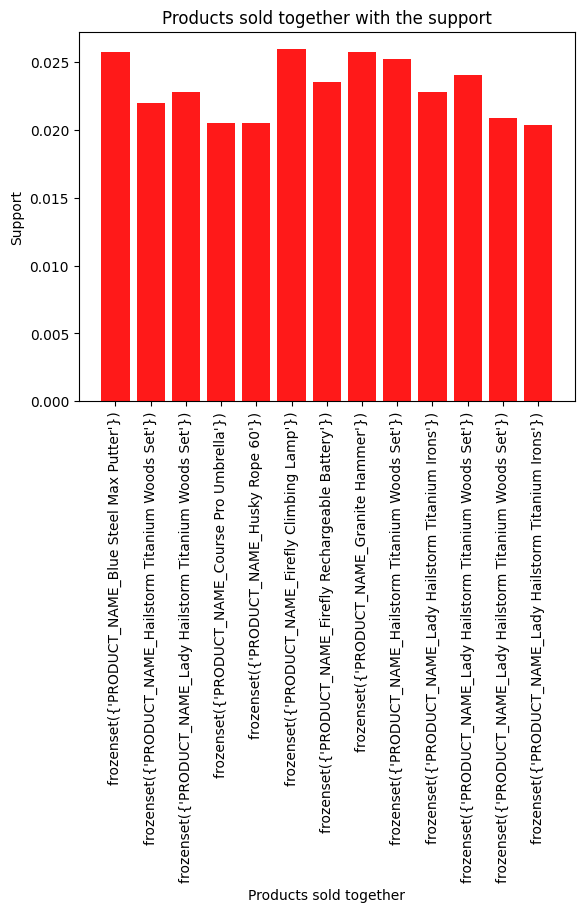

In [68]:
plt.bar(x=range(0, len(rules)), height=rules["support"], tick_label=rules["antecedents"], alpha=0.9, color="red")
plt.title("Products sold together with the support")
plt.xlabel("Products sold together")
plt.ylabel("Support")
plt.xticks(rotation=90)
plt.show()